# Data Exploration and Visualization

In this hands-on lecture session, you will learn how to use Python to explore and visualize data. Before running any models, a data scientist must understand of properties and relationships in a dataset. There are two goals for data exploration and visualization:

i) to understand the relationships between data columns. 

ii) to identify useful features for building the model in your data project.

## Data Visualization
Python supports the matplotlib library that gives extensive graphical capabilities.  Additionally, the Python Pandas library adds higher level plotting capability. These features make Python a useful language to create visualizations of your data when exploring relationships between the data features. 

First we have to load the data set.

### Loading the traffic dataset
Run the following lines of code to load the traffic data set that I have shared. After loading the dataset, we need to run a series of the plotting tools that we have seen in the lecture. 

In [4]:
import pandas as pd

infile='traffic_data.csv'  
df=pd.read_csv(infile,parse_dates=['measurement_start'],usecols=['zone_id','measurement_start','speed','volume','occupancy'])

df=df[df['zone_id']==10031]

df=df.sort_values('measurement_start')

print(df.head())

   zone_id   measurement_start      speed  volume  occupancy
0    10031 2017-11-03 00:00:00  59.446599      52   2.261905
1    10031 2017-11-03 00:05:00  62.216667      39   1.400000
2    10031 2017-11-03 00:10:00  54.527551      56   2.400000
3    10031 2017-11-03 00:15:00  56.950000      42   1.377778
4    10031 2017-11-03 00:20:00  48.584444      46   1.955556


In [5]:
# remove the zone_id column, since we are working with the data from one detector only

df.drop('zone_id',1,inplace=True)

print(df.head())

    measurement_start      speed  volume  occupancy
0 2017-11-03 00:00:00  59.446599      52   2.261905
1 2017-11-03 00:05:00  62.216667      39   1.400000
2 2017-11-03 00:10:00  54.527551      56   2.400000
3 2017-11-03 00:15:00  56.950000      42   1.377778
4 2017-11-03 00:20:00  48.584444      46   1.955556


### Scatter Plot

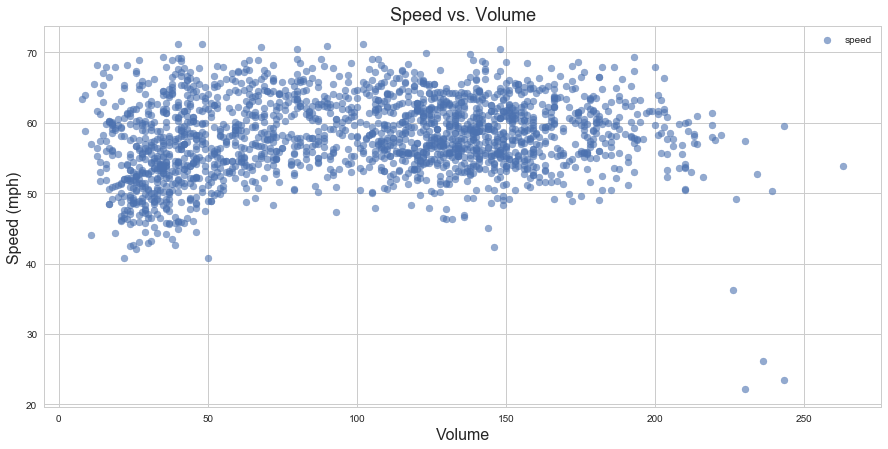

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig,ax1=plt.subplots(figsize=(15,7))

ax1.scatter(df['volume'], df['speed'],alpha=0.6)

ax1.set_xlabel('Volume', size=16)
ax1.set_ylabel('Speed (mph)', size=16)

ax1.set_title('Speed vs. Volume', size=18)

plt.grid(True)
ax1.legend()

## Scatter Matrix

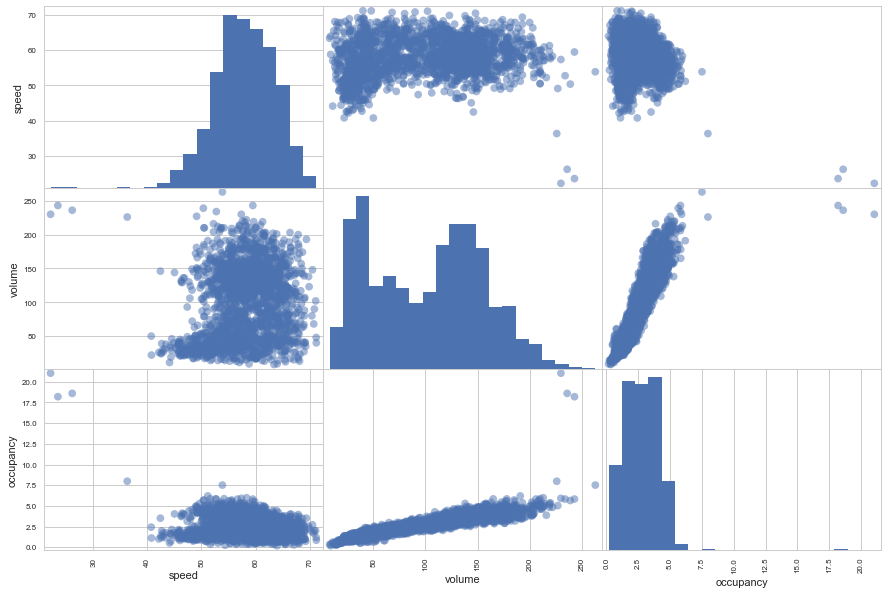

In [7]:
import matplotlib.pyplot as plt

plt = pd.plotting.scatter_matrix(df, figsize=(15,10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.5)


## Line Plot 

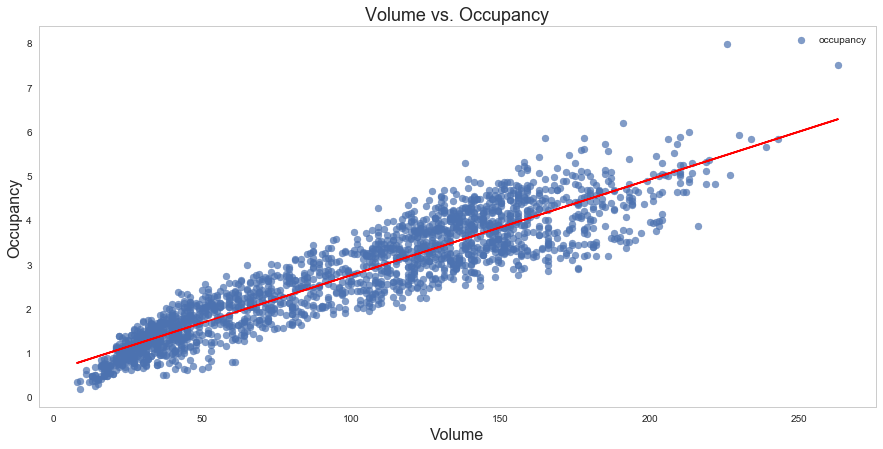

In [8]:
import matplotlib.pyplot as plt

df2=df[df['occupancy']<10]

fit = np.polyfit(df2['volume'],df2['occupancy'],1)

fit_fn1 = np.poly1d(fit)

Y = fit_fn1(df2['volume'])

fig,ax2 = plt.subplots(figsize=(15,7))
ax2.scatter(df2['volume'], df2['occupancy'],alpha=0.7)
ax2.plot(df2['volume'],Y,'-r')

ax2.set_xlabel('Volume',size=16)
ax2.set_ylabel('Occupancy',size=16)
ax2.set_title('Volume vs. Occupancy', size=18)

plt.grid()
ax2.legend()

## Histogram Plot

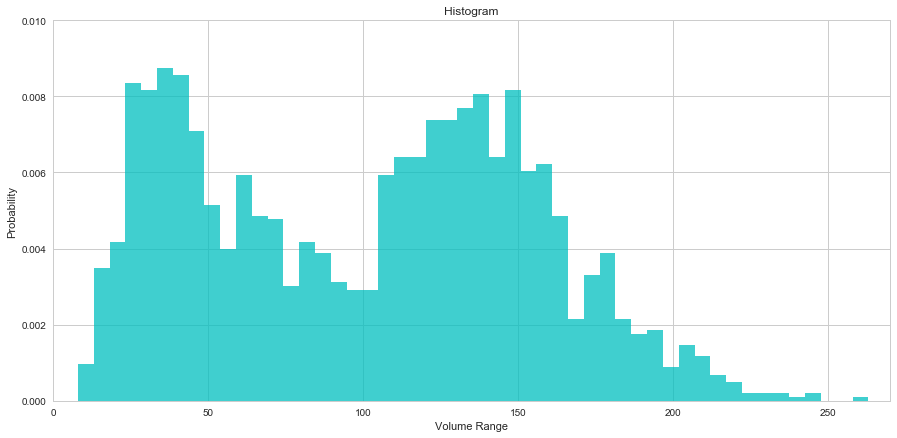

In [9]:
import matplotlib.pyplot as plt


# the histogram of the data

fig, ax3 = plt.subplots(figsize=(15,7))

n, bins, patches = ax3.hist(df['volume'], 50, density=True, facecolor='c', alpha=0.75)

ax3.set_xlabel('Volume Range')
ax3.set_ylabel('Probability')
ax3.set_title('Histogram')

ax3.axis([0, 270, 0, 0.01])
ax3.grid(True)
plt.show()

In [10]:
bins

array([   8. ,   13.1,   18.2,   23.3,   28.4,   33.5,   38.6,   43.7,
         48.8,   53.9,   59. ,   64.1,   69.2,   74.3,   79.4,   84.5,
         89.6,   94.7,   99.8,  104.9,  110. ,  115.1,  120.2,  125.3,
        130.4,  135.5,  140.6,  145.7,  150.8,  155.9,  161. ,  166.1,
        171.2,  176.3,  181.4,  186.5,  191.6,  196.7,  201.8,  206.9,
        212. ,  217.1,  222.2,  227.3,  232.4,  237.5,  242.6,  247.7,
        252.8,  257.9,  263. ])

## Bar Plots

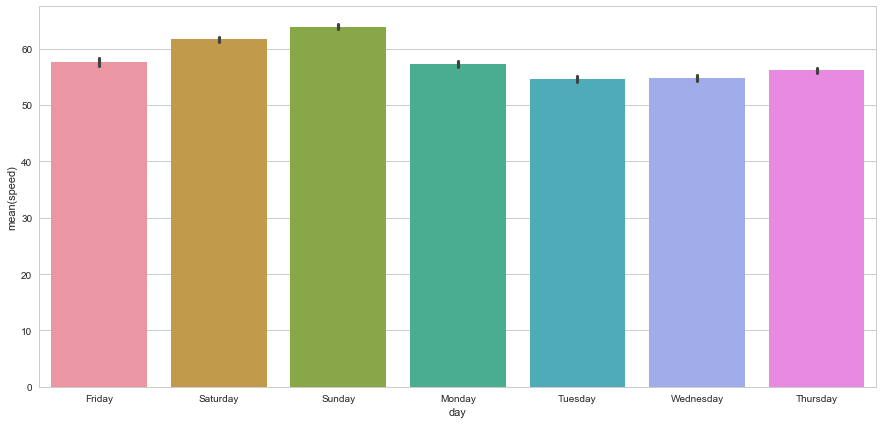

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax_1=plt.subplots(figsize=(15,7))

df['day']=df['measurement_start'].dt.weekday_name
sns.set(style="whitegrid")
ax_1 = sns.barplot(x="day", y="speed", data=df)


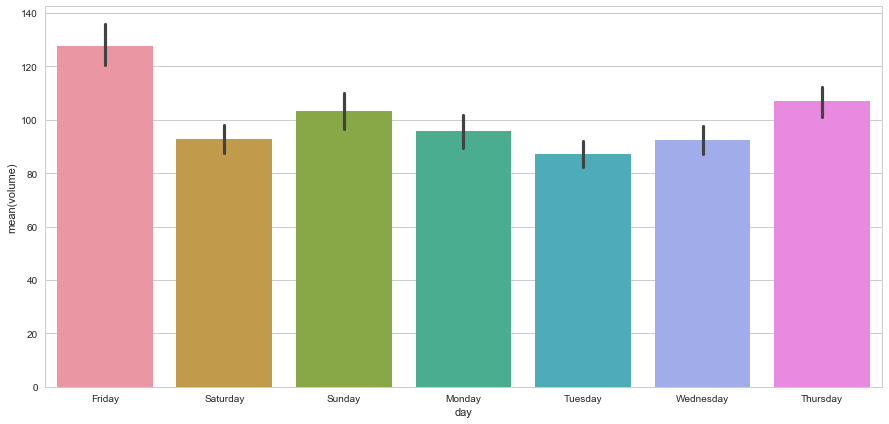

In [12]:
fig, ax_2=plt.subplots(figsize=(15,7))
ax_2 = sns.barplot(x="day", y="volume", data=df)

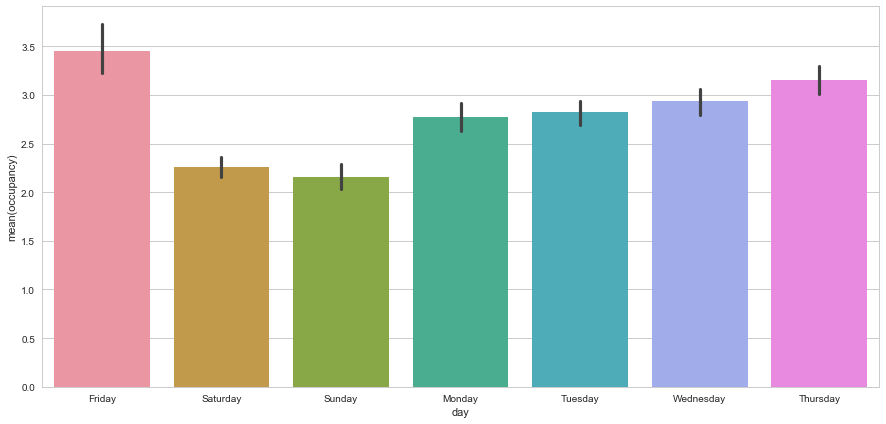

In [13]:
fig, ax_3=plt.subplots(figsize=(15,7))
ax_3 = sns.barplot(x="day", y="occupancy", data=df)

## Box Plot

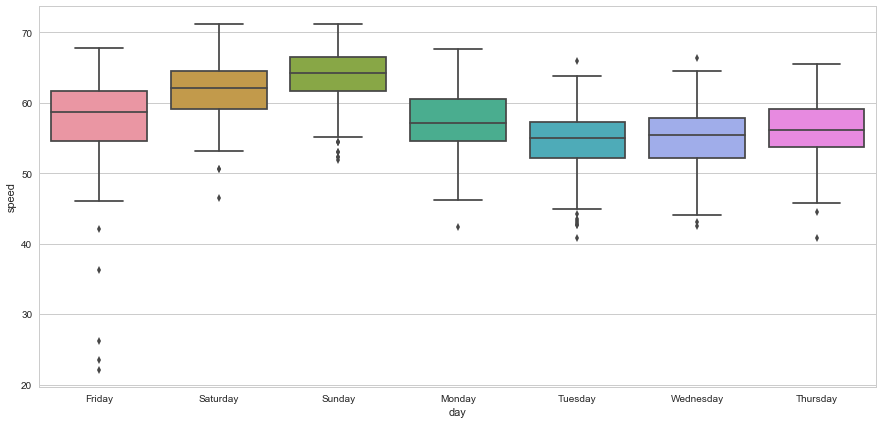

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax_4=plt.subplots(figsize=(15,7))
sns.set(style="whitegrid")
ax_4 = sns.boxplot(x="day", y="speed", data=df)
plt.show()

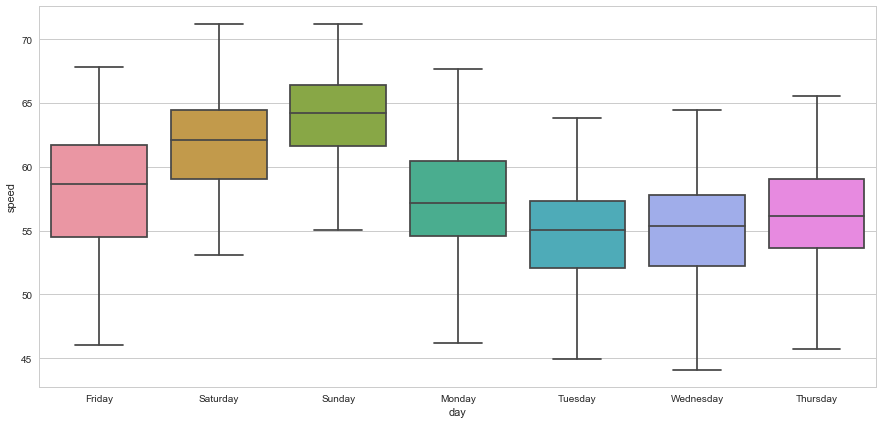

In [22]:
# without the outliers 
fig, ax_4=plt.subplots(figsize=(15,7))
sns.set(style="whitegrid")
ax_4 = sns.boxplot(x="day", y="speed", data=df, showfliers = False)
plt.show()

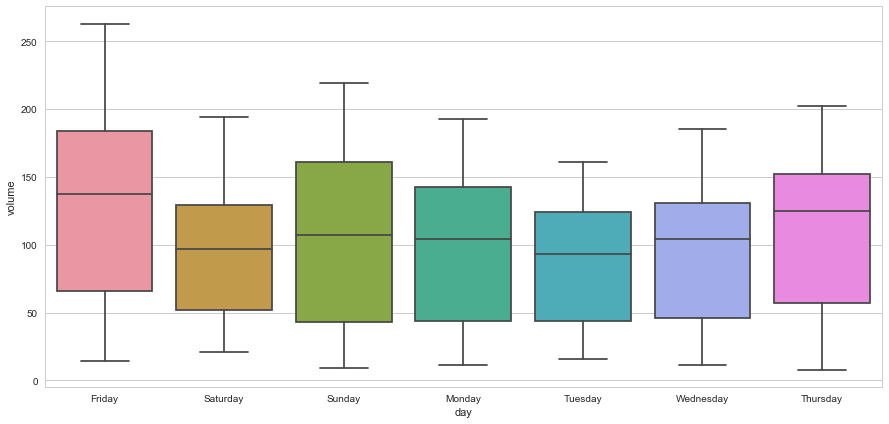

In [24]:
fig, ax_5= plt.subplots(figsize=(15,7))
ax_5 = sns.boxplot(x="day", y="volume", data=df)
plt.show()

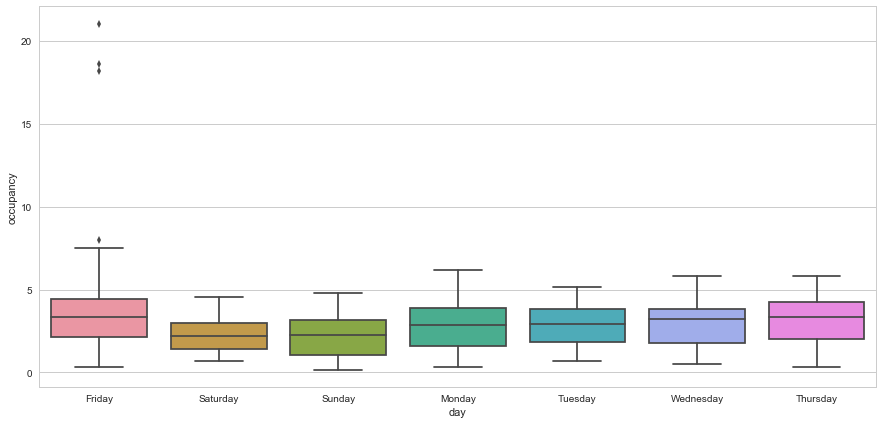

In [25]:
fig, ax_6=plt.subplots(figsize=(15,7))
ax_6 = sns.boxplot(x="day", y="occupancy", data=df)
plt.show()

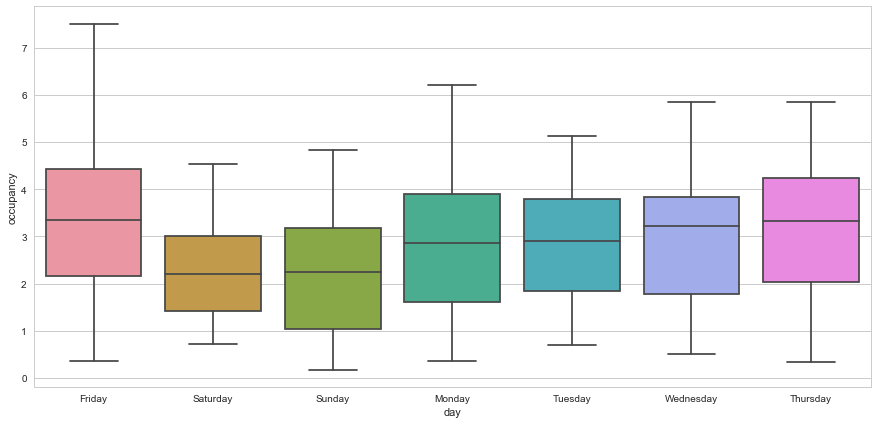

In [26]:
fig, ax_6=plt.subplots(figsize=(15,7))
ax_6 = sns.boxplot(x="day", y="occupancy", data=df, showfliers = False)
plt.show()

## Violin Plot

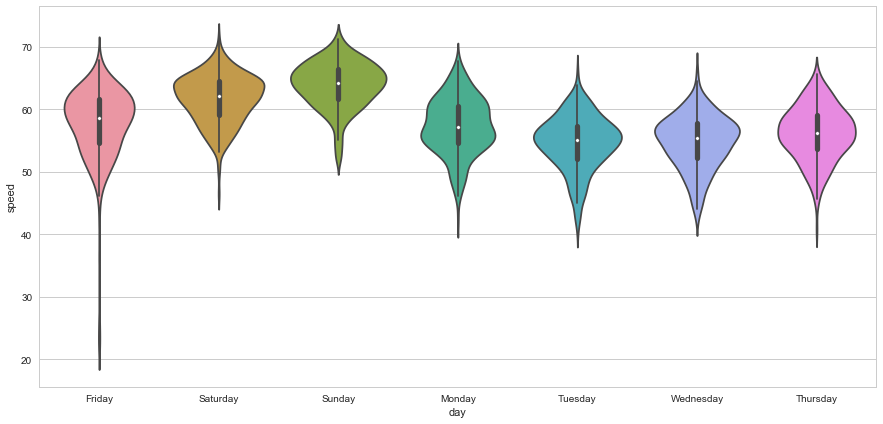

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax_7=plt.subplots(figsize=(15,7))
sns.set(style="whitegrid")

ax_7 = sns.violinplot(x="day", y="speed", data=df)

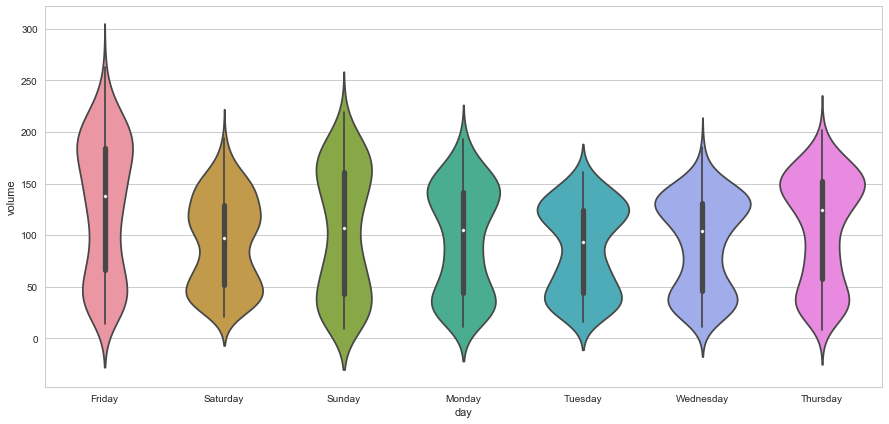

In [29]:
fig, ax_8=plt.subplots(figsize=(15,7))

ax_8 = sns.violinplot(x="day", y="volume", data=df)
plt.show()

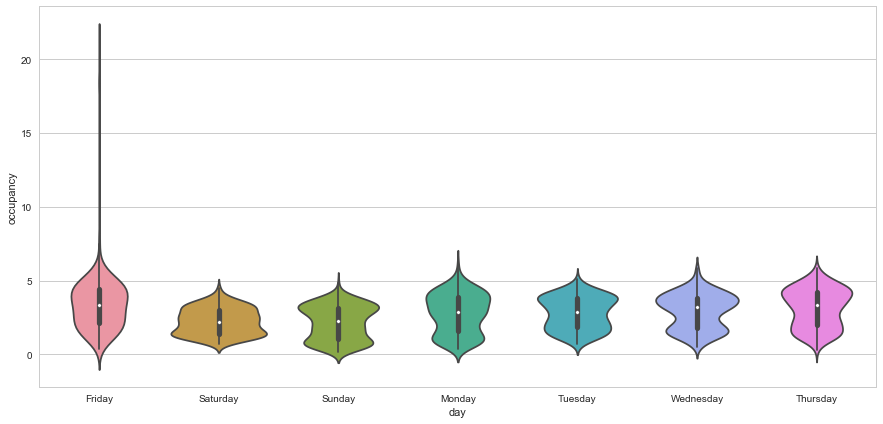

In [30]:
fig, ax_9=plt.subplots(figsize=(15,7))

ax_9 = sns.violinplot(x="day", y="occupancy", data=df)

## Q-Q plot

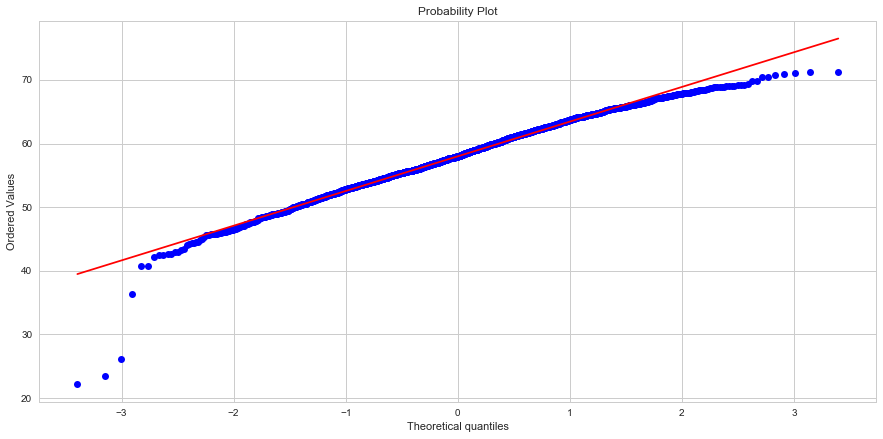

In [31]:
import pylab 
import scipy.stats as stats

fig, ax_10=plt.subplots(figsize=(15,7))

stats.probplot(df['speed'], dist="norm", plot=pylab)
pylab.show()

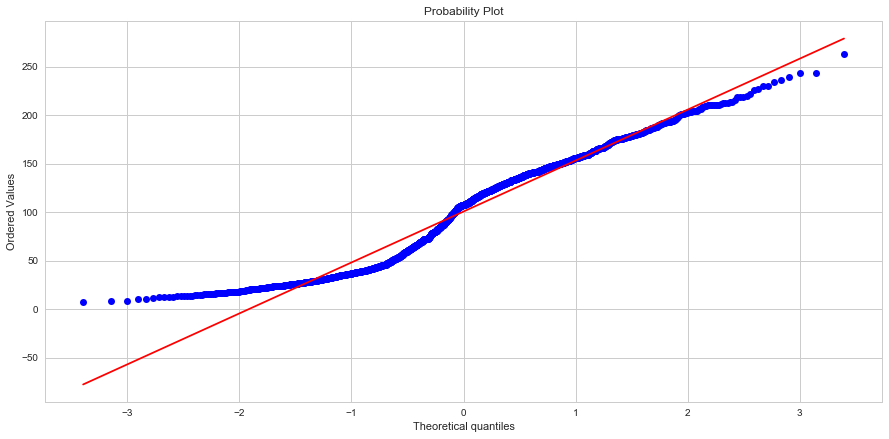

In [32]:
fig, ax_11=plt.subplots(figsize=(15,7))

stats.probplot(df['volume'], dist="norm", plot=pylab)

pylab.show()

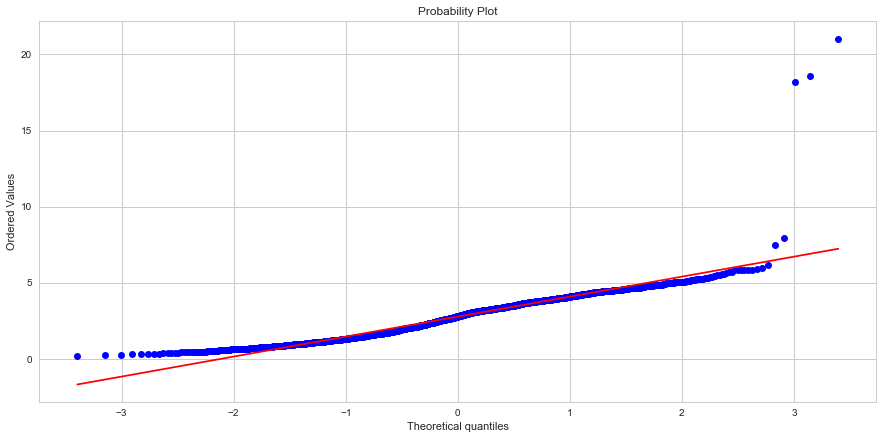

In [33]:
fig, ax_12=plt.subplots(figsize=(15,7))

stats.probplot(df['occupancy'], dist="norm", plot=pylab)

pylab.show()

# Practice Tutorials

1. Prof. Paul Waddell's lecture on data visualization with pandas 
https://github.com/ual/urban-informatics-and-visualization/blob/master/09-data-visualization/data-viz.ipynb

2. Visualizing NYC's taxicab data, will help answer a question in HW1.  
   Get the notebook from here https://anaconda.org/jbednar/nyc_taxi/notebook